# Sentiment Analysis for TripAdvisor Reviews

* EDA 
  - [CountPlot](#countplot)
  - [WordCloud](#wordcloud)
* Analyse Sentiments using NLTK
  - [Negative Sentiments](#negsentiments)
  - [Positive Sentiments](#possentiments)
* [Keywords Queries](#keywords)


In [190]:
import pandas as pd
import seaborn as sns

In [191]:
df = pd.read_csv('https://raw.githubusercontent.com/theleadio/datascience_demo/master/tripadvisor_hotel_reviews.csv')

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


# Exploring the Data

<a id="countplot"></a>
### CountPlot

<AxesSubplot:xlabel='Rating', ylabel='count'>

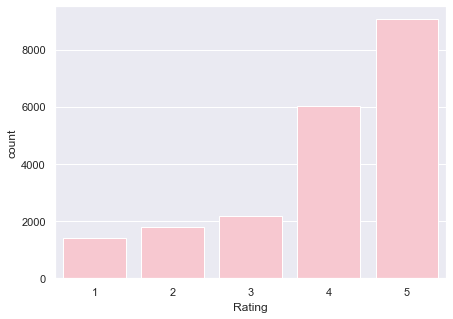

In [193]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(data=df, x='Rating', color='pink')

<a id="wordcloud"></a>
### WordCloud

In [194]:
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(['hotel', 'room', 'rooms', 'resort', 'night', 'day', 'time', '''n't''', 'stay'])

In [195]:
def wordcloud_generator(data, title = None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color = 'white',
                          min_font_size = 10, 
                          stopwords = stopwords
                         ).generate(" ".join(data.values))

    # plot the WordCloud image
    plt.figure(figsize = (5, 5), facecolor = None)
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title,fontsize = 20)
    plt.show()

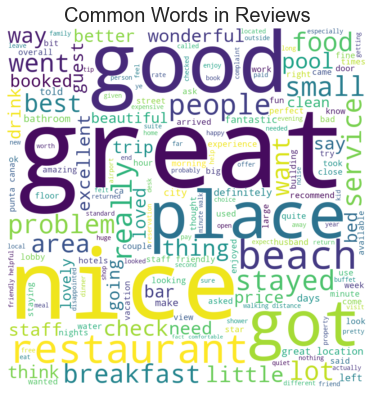

In [196]:
wordcloud_generator(df['Review'], title="Common Words in Reviews")

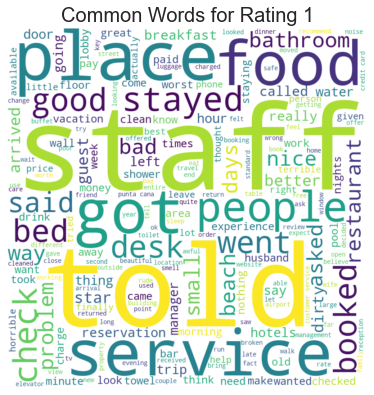

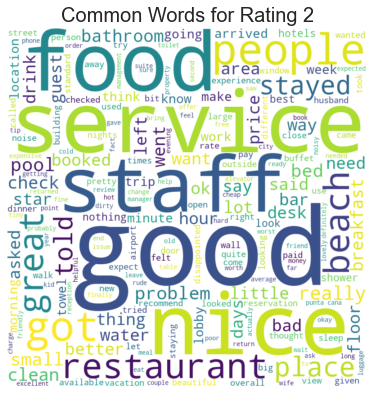

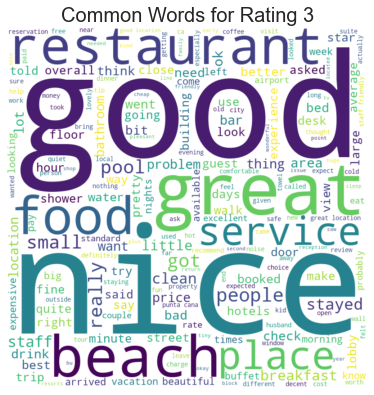

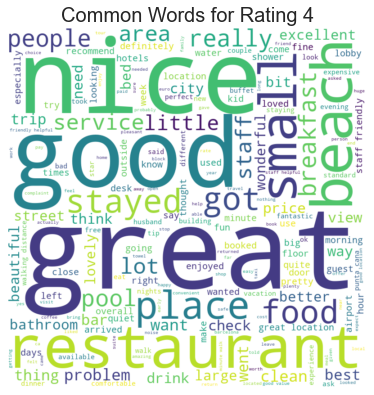

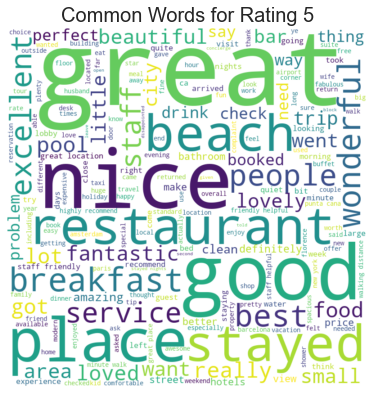

In [197]:
# dive into individual rating groups
for rating in range(1,6):
  reviews = df[df['Rating'] == rating]
  wordcloud_generator(reviews['Review'], title="Common Words for Rating " + str(rating))

<a id="sentiments"></a>
# Analyse Sentiments using NLTK

In [198]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\munmun\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [199]:
sentiments = [analyzer.polarity_scores(review)['compound'] for review in df['Review']]

df['Sentiments'] = sentiments
df.head()

,Review,Rating,Sentiments
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",4,0.9747
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2,0.9787
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car service price 53 tip reasonable driver waiting arrival.checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n't stay, night got 12/1a checked voucher bottle champagne nice gesture fish waiting room, impression room huge open space felt room big, tv far away bed chore change channel, ipod dock broken disappointing.in morning way asked desk check thermostat said 65f 74 2 degrees warm try cover face night bright blue light kept, got room night no, 1st drop desk, called maintainence came look thermostat told play settings happy digital box wo n't work, asked wakeup 10am morning did n't happen, called later 6pm nap wakeup forgot, 10am wakeup morning yep forgotten.the bathroom facilities great room surprised room sold whirlpool bath tub n't bath amenities, great relax water jets going,",3,0.9889
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed 

<a id="negsentiments"></a>
### Negative Sentiments

In [200]:
neg_df = df[df['Sentiments'] <= -0.05].sort_values("Sentiments")
neg_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,1569.0,1.738050,0.972629,1.0000,1.0000,1.0000,2.0000,5.0000
Sentiments,1569.0,-0.674307,0.271835,-0.9974,-0.9102,-0.7506,-0.4927,-0.0511


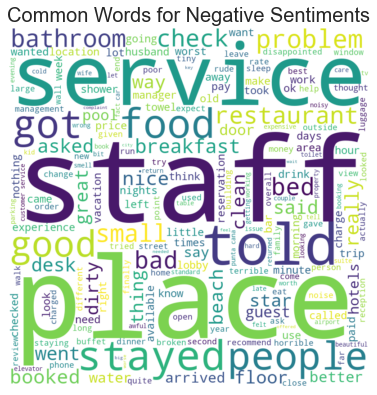

In [201]:
wordcloud_generator(neg_df['Review'], title="Common Words for Negative Sentiments")

In [202]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
feature = tfidf.fit_transform(neg_df['Review'])

In [203]:
query = "staff"
query_feature = tfidf.transform([query])

cosims = cosine_similarity(query_feature, feature).flatten()
results = reversed(cosims.argsort()[-6:-1])

for r in results:
  print('-----')
  print(neg_df.iloc[r]['Review'])

-----
hated inn terrible, room-service horrible staff un-welcoming, decor recently updated lacks complete look, managment staff horrible,  
-----
terrible desk staff ana management bought 3 tickets wife daughter vip features, 2 desk people handling time coming going passengers, wrong type room 3 1/2 hours lining check coming going inspect rooms pay extra room reserved place, no superivisor sight willing help, staff rude uncaring accepting 20 dollars bribes solve problems luck like no drinking water no a/c smelly rooms no working toilets broken tv etc.there no staff help luggage, experienced hotel like, stay away hotel.the food restaurant staff good drinks terrible,  
-----
subpar hotel rude staff damaged car stayed hotel gioconda days, time staff rude unhelpful room not par amenities promised not delivered, asked directions locations florence given factually incorrect information hotel staff, no in-room safe hotel turn keys desk left morning, adding concern came early staff inexplicabl

In [204]:
# rating scale equals to 5 but negative sentiments
pd.set_option('display.max_colwidth', None)
neg_df[neg_df['Rating'] == 5].sort_values("Sentiments")[0:5]

,Review,Rating,Sentiments
3613,"fabulous, booking vacation 4 dismay realized punta cana not mexico, frantically searched information possibly iberostar punta cana, tripadvisor helpful reading personal reviews experiences nervous wreck, apprehension arrived 12/5/03, arrival airport flights arriving time orderly fashion went quickly, check went wanted king sized beds none available till day, no problem, grounds absolutely beautifull maintained, entire resort practically spotless, people work hard cleaning areas resort, met unfriendly worker, bent backward accomodate reason course, food aplenty satisfy tastebuds, types activity spanish lessons dancing arobics, did nothing relax eat drink dance alittle night, no group got sick brushed teeth spigot water, believe moderation probably key, rooms clean no trouble whatsoever housekeeping, wonder people wrote negative remarks place stayed sameplace did, thing upset trip did not book weeks, heart beat,",5,-0.9677
7143,"wonderful 10 year anniversay went secrets feb. 28- mar, 6 2004. read million reviews quite nervous going having bad experience, not happened, beautiful experience, resort beautiful people friendly accommidating, thing wrong, negative review true slowness service restaurants, did bring bug spray use not night walked beach, complaint resort little pet peeve n't cappucino 10:00, like alot earlier really no big deal, resort heart beat try new place, worrying good place, absolutely, email question,",5,-0.9272
13296,"hell argonaut changed planned birthday getaway city husband, stuck work til late night, packed grabbed sleepy kids drove argonaut, husband not eaten breakfast things not going, cranky kids irrate husband prayed hotel nice, tripadvisor took chance, soon dinner 10pm stood line 2 couples germans needed explained, thought worst going, time turn receptionist bit annoyed ordeal, requested room gave key, turned mentioned husband birthday bad start, suggested room 2 queens not satisfactory best comfortable, went room definitely quiet inner court nothing write home, went downstairs asked choices, suggested ocean view king size bed separate pull sofa children, jacuzzi tub, offered room deep discount took, receptionist n't warm fuzzy type person encountered gets a+ trying knowing condition.it luxurious comforter 2 bedroom suite-pocket doors table minibar huge space thousand square feet overlooking alcatraz ocean leopard robes huge jacuzzi tub family fit, 2 kids, husband able sleep luxurious bath, kids plenty running room.i sad leave know time, request upgrade king suite night, btw park beach parking garage, cheaper,",5,-0.9252
12767,"dumbstruck nothing kudos place check check room staff nothing short excellent, view room overlooking trade center river incredible, weekend kind quiet want, skip restaurant recommendations church day rate..you wo n't dissapointed, traveller spends 80 nights year hotels, place star rating, not solid, loved having starbucksa door complaint lack coffee maker room, thats complaint,",5,-0.9060
3199,"disgusted comments just wanted make comments, notice bad reviews come cities north-east usa, makes sick listen prejudice comments, n't realize iknow n't foreigner going country need learn language, dont criticise country does n't know speak english, wake people different attitude explore different cultures, ca n't stay home visit english speaking country,",5,-0.9021


<a id="possentiments"></a>
### Positive Sentiments

In [205]:
pos_df = df[df['Sentiments'] >= 0.05].sort_values("Sentiments")
pos_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,18831.0,4.144549,1.053647,1.00,4.0000,4.0000,5.0000,5.0000
Sentiments,18831.0,0.930463,0.136119,0.05,0.9436,0.9774,0.9897,0.9999


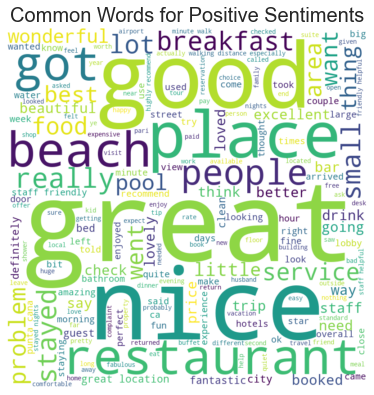

In [206]:
wordcloud_generator(pos_df['Review'], title="Common Words for Positive Sentiments")

In [207]:
feature = tfidf.fit_transform(pos_df['Review'])

In [208]:
query = "great"
query_feature = tfidf.transform([query])

cosims = cosine_similarity(query_feature, feature).flatten()
results = reversed(cosims.argsort()[-6:-1])

for r in results:
  print('-----')
  print(pos_df.iloc[r]['Review'])

-----
great place say not said, great hotel great staff excellent location,  
-----
hotel great hotel great money clean good resturant great staff worth location great,  
-----
great hotel great location great service stayed hotel 3 nights, rooms nice clean, service great, best location, definitely stay amsterdam,  
-----
100 happy, sad leave, great views harbour/city great service great hotel great room great food great bar great facilities great location clean comfortable modern staff helpful, felt like 5 star hotel 5 star price, hk assuming prices similar definately stay time.very happy,  
-----
regular, amazing value, stay hotel let, great beds great balconies great breakfast great staff great location great value, fantastic pool, amazing value money,  


In [209]:
# rating scale equals to 1 but positive sentiments
pd.set_option('display.max_colwidth', None)
pos_df[pos_df['Rating'] == 1].sort_values("Sentiments")[0:5]

,Review,Rating,Sentiments
7480,"hated cocktails hello concierge, promised complimentary cocktails watered not southern standards georgia standards, oh n't think trying sneak extra people room remember happened paul mccartney,",1,0.0516
7196,"avoid save money overpriced hotels stayed does n't include breakfast, walls paper actually hear people urinating room, disgusting, morning maids woke shouting hall, standard cleanliness non existent, entire stay used plasters stuck shelf mirrors half cardboard anti slip mat stuck bath, positive bed fairly comfortable pointless noisy-even ear plugs, basically paying location young n't mind using public transport advise staying minutes paying half money,",1,0.0516
12512,"disappointed returned month trip resort disappointed stay, beaches dominican republic beautiful beaches property paradise bavarro, accomodations matter, room linens smelled mildew, beds linens old stained, refrigerator stocked beverages difficult simple things room, long process obtain ironing board iron, brought room limited hour use, food hotel terrible, not picky eater generally like eat place travel, place exception, food overcooked oily salty, meats fatty tough, sausages cold cuts tasted like came, food did eat sick days, n't available drink outside frozen mixed drinks, did n't normal mixers alcohol, did n't cranberry juice grapefruit juice available, rained days stay not property inclimate weather, activities staff inexperienced unimaginative, entertainment consisted karoke performances, excursions outside hotel 75 majority involved water sports, better time jamaica mexico,",1,0.0516
600,"not return park plaza extremely unhappy stay park plaza, level service embarassing waited 30 minutes hold concierge twice one-night stay evening morning took 20 minutes check hotel bar staff disgruntled far accomodating, return park plaza encourage explore hotels boston far exceed park plaza quality level service,",1,0.0534
19265,"disappointing booked hotel based reviews read disappointed, booked superior rooms paying price, couple given room just big house double bed, single travelling companion given single room feet square floor space shower flooded room used.we complained immediately reception staff unhelpful saying hotel fully booked no duty manager able speak, day did manager changed rooms descent sized doubles filthy, bath hair nail clippings carpet, rooms did not bedding did arrive handed duvet covers separately left making ourselves.on plus hotel located nice area amsterdam park hotel lovely walk centre.the hotel close needed refurbishment november got distinct feeling staff lost doing jobs properly, certainly not return,",1,0.0571


<a id="keywords"></a>
# Keywords Queries

In [210]:
feature = tfidf.fit_transform(df['Review'])

In [211]:
q1 = "overpriced"
q2 = "terrible"
q3 = "best breakfast"
q4 = "atmosphere"
q5 = "problem"

queries = [q1, q2, q3, q4, q5]

for i in queries: 
    query_feature = tfidf.transform([i])

    if i == q1: 
        print("\n\nKeywords 1:",'\033[1m' + i + '\033[0m')
        print(query_feature)
    elif i == q2: 
        print("\n\nKeywords 2:",'\033[1m' + i + '\033[0m')
        print(query_feature)
    elif i == q3: 
        print("\n\nKeywords 3:",'\033[1m' + i + '\033[0m')
        print(query_feature)
    elif i == q4: 
        print("\n\nKeywords 4:",'\033[1m' + i + '\033[0m')
        print(query_feature)
    elif i == q5: 
        print("\n\nKeywords 5:",'\033[1m' + i + '\033[0m')
        print(query_feature)

    cosims = cosine_similarity(query_feature, feature).flatten()
    results = reversed(cosims.argsort()[-6:-1])
    # print(results)

    for r in results: 
        print('-----')
        print(f"similarity score: {cosims[r]:.4f}, \nreview: {df.iloc[r]['Review']}")



Keywords 1: overpriced
  (0, 33804)	1.0
-----
similarity score: 0.6219, 
review: overpriced overpriced hotel rooms small breakfast v average, good location, unfortunately arrived hotel booked, moved hotel night right pain,  
-----
similarity score: 0.4862, 
review: good overpriced stayed 3 days, good overpriced hotel, good breakfast breakfast room, service staff not friendly, rooms small, good disappointing, lot noise, rooms wc renewed not, good location,  
-----
similarity score: 0.4363, 
review: overpriced got friends family discount room way overpriced, location great walking various places city room tiny, no idea hilton insists making people pay internet access especially room expensive, not particularly impressive,  
-----
similarity score: 0.4035, 
review: overpriced unbearably rude staff grounds amenities resort absolutely stunning incredibly overpriced, boyfriend went off-season got great deal room ocean view guests hotel, eating drinking hotel ridiculously expensive medicore